# Logistic Regression

Logistic regression is a clasification model that is very easy to implement but performs very well on linearly seperable classes. It is one of the most widely used algorithms for classification in the industry. Logistic regression is a linear model for **binary classification** that can be extended to multiclass classification as you will learn in the advanced Machine Learning courses.

To explain the idea behind the logistic regression as a probabilistic model, let's first introduce the **odds ratio**, which is the odds in favor of a particular event. The odds ration can be written as $\frac{p}{(1-p)}$, where $p$ stands for the probability of a positive event. Note that the term _positive event_ does not necessarily mean good, but refers to the event that we want to predict, for example, the probability that a patient has a certain disease; we can think of the positive event as the class label $y=1$. We can then further define the **logit** function, which is simply the logarithm of the odds ratio (log-odds):

$$logit(p)=log\frac{p}{(1-p)}$$

The logit function takes input values in the range $0$ to $1$ and transforms them to the values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds:

$$logit(p(y=1|x))=w_0x_0+w_1x_1+...+w_mx_m=w^Tx$$

where $p(y=1|x)$ is the conditional probability that a particular sample/instance belong to class $1$ given its features $X$.

Now that we are actually intersted in is predicting the probability that a certain sample belong to a particular class, which is the inverse form of the logit function. It is also called the *logistic* function, simetimes simply abbreciated as _sigmoid_ function due to its characteristic S-shape.

$$\phi(z)=\frac{1}{1+e^{-z}}=\frac{1}{1+e^{-(w_0x_0+w_1x_1+...+w_mx_m)}}$$

Now let's simply plot the sigmoid functuin for some values in the range $-8$ tp $8$ to see what it looks like:


(-8.0, 0.0003353501304664781)


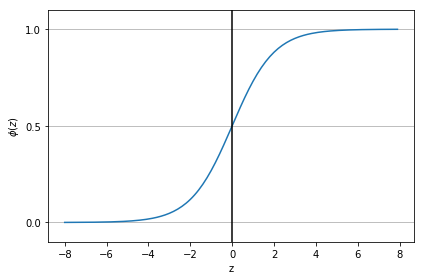

In [11]:
#################################### Visualization of Sigmoid Function ####################################

# Import necessary libraries and modules
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid Function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# List of values
z = np.arange(-8, 8, 0.1) # Return evenly spaced values within a given interval using the specified step 
phi_z = sigmoid(z)        # Takes z as input and returns sigmoid of z
print(z[0],phi_z[0])      # See first elements of arrays

# Visualization parameters
plt.plot(z, phi_z)          # Specify what to plot
plt.axvline(0.0, color='k') # Add a vertical line across the axes
plt.ylim(-0.1, 1.1)         # Set the y-limits of the current axes
plt.xlabel('z')             # Set label of x axis         
plt.ylabel('$\phi (z)$')    # Set label of y axis

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()         # Display the figure


We can see that $\phi(z)$ approaches 1 if $z$ goes towards infinity $(z \to \infty)$, since $e^{-z}$ becomes very small for large values of $z$. Similarly,  $\phi(z)$ goes towards 0 for $(z \to -\infty)$ as the result of an increasingly large denominator. Thus, we conclude that this sigmoid function takes real number values as input and transforms them to values in the range $[0,1]$ with an intercept at $\phi(z)=0.5$

The output of the sigmoid function is interpreted as the probability of particular sample belonging to class $1$  $\phi(z)=p(y=1 \mid x;w)$, given its features $x$ parameterized by the weights $w$. For example, if we compute $\phi(z)=0.8$ for a particular flower sample, it means that the chance that this sample is an Iris-Versicolor flower is $80\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p(y=0 \mid x;w)=1-P(y=1 \mid x;w)=0.2$ or $20\%$. The predicted probability can the simply be converted into a binary outcome via a function:

$$
    \widehat{y}  =\left\{
                \begin{array}{ll}
                  1 \text{ if } \phi(z) \geq 0.5\\
                  0 \textit{ otherwise }\\
                \end{array}
              \right.
$$

If we look at the predictive sigmoid plot, this is equivalent to the following:

$$
    \widehat{y}  =\left\{
                \begin{array}{ll}
                  1 \text{ if } z \geq 0.0\\
                  0 \textit{ otherwise }\\
                \end{array}
              \right.
$$

As we have already discussed, there are many applications where we are not only interested in the predicted class labels, but where estimating the class-membership probability is particularly useful. Logistic regression is used in weather forecasting, for example, to not only predict if it will rain on a particular day but also to report the chance of rain. Similarly, logistic regression can be used to predict the chance that a patient has a particular disease given certain symptoms, which is why logistic regression enjoys wide popularity in the field of medicine.

# Training a logistic regression model with scikit-learn

In [14]:
######################################### Load Libraries and Data #########################################

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# Import necessary libraries and modules 
# Matplotlib inline allows the output of plotting commands will be displayed inline
%matplotlib inline                      
from sklearn.datasets import load_iris  # iris dataset
from sklearn import linear_model        # The sklearn.linear_model module implements generalized linear models. LR is part of this module

# Load the Iris data set
# See 'ISOM 672_Decision Trees' for a description of this data set
iris = load_iris()
X = iris.data[:, [2, 3]]                # Specify attributes
y = iris.target                         # Specify target variable

When we create an instance of a classifier, the parameter $C$ is the inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

Multiclass option can be either ‘ovr’ or ‘multinomial’. If the option chosen is ‘ovr’, then a binary problem is fit for each label. Else the loss minimised is the multinomial loss fit across the entire probability distribution.

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 

In [43]:
######################################### Load Libraries and Modules #########################################

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

############################################    Split the Data   ############################################

# Split validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

#################################### Train the Logistic Regression Model ####################################

# We create an instance of the Classifier
# Logistic Regression (aka logit) classifier.
clf = linear_model.LogisticRegression(C=1e5) # C parameter is the inverse of regularization strength
                                             # C must be a positive float
                                             # C in this case is 1/lambda
                                             # Smaller values specify stronger regularization
                                             # Applies regularization by default; you can set C very large to avoid regularization (setting penalty l2 can speed up the estimations with a very large C)
# Train the model (fit the data)
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, 
# of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], 
# holding the class labels for the training samples:
clf = clf.fit(X_train, y_train)
print('The weights of the attributes are:', clf.coef_)


#################################### Apply the Logistic Regression Model ####################################

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=iris.target_names))



The weights of the attributes are: [[-6.59704616 -8.51895337]
 [ 1.47462338 -3.04615702]
 [ 7.79614707  8.63552938]]
0 [7.99259179e-01 2.00740821e-01 9.13407541e-16] 1.0
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        20
 versicolor       0.95      1.00      0.98        20
  virginica       1.00      0.95      0.97        20

avg / total       0.98      0.98      0.98        60



In the case of the Iris dataset, the samples are balanced across target classes hence the accuracy and the F1-score are almost equal.

# Applying the logistic regression model

In [23]:
#################################### Apply the Logistic Regression Model ####################################

# After being fitted, the model can then be used to predict the class of samples:
print('The 1st instance is predicted to belong to class:', clf.predict(iris.data[:1, [2, 3]]))

# Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:
print('The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(iris.data[:1, [2, 3]]))

# Try also clf.decision_function(X)
# The desion function tells us on which side of the hyperplane generated by the classifier we are 
# (and how far we are away from it). Based on that information, the estimator then label the examples 
# with the corresponding label.

The 1st instance is predicted to belong to class: [0]
The probabilities of belonging to each one of the classes are estimated as: [[8.14574852e-01 1.85425148e-01 3.35378283e-18]]


# Visualizing the logistic regression boundaries

In [24]:
# Function that will help us visualize the decision surfaces
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2= np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
                    



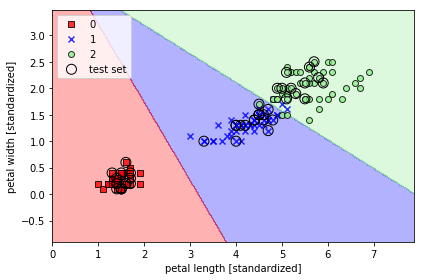

In [25]:
from sklearn.linear_model import LogisticRegression
#from mlxtend.plotting import plot_decision_regions

# Function that will help us visualize the decision surfaces
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=1e5, random_state=1)
lr.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=lr, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#  Estimating Generalization Performance with Cross-Validation

In the basic approach, called $k$-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:


- A model is trained using $k$-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).


The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small.

The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

The following example demonstrates how to estimate the accuracy of a logistic regression on the iris dataset by splitting the data, fitting a model and computing the score 5 and 10 consecutive times respectively (with different splits each time):

In [27]:
#################################### Logistic Regression with Cross Validation ####################################

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Fit model to all the data
clf_lr = linear_model.LogisticRegression(C=1)

# Evaluate performance with cross-validation
# Read more about cross_val_score in the following link 
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

# Accuracy
scores=cross_val_score(clf_lr, iris.data[:, [2, 3]], iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# F-1 scores
scores_f1=cross_val_score(clf_lr, iris.data[:, [2, 3]], iris.target, cv=10, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))# returns an array of scores of the estimator for each run of the cross validation.
print(scores_f1)

Accuracy: 0.87 (+/- 0.14)
[0.86666667 0.83333333 0.83333333 0.8        1.        ]
F1-score: 0.86 (+/- 0.17)
[0.78021978 0.86111111 0.86111111 0.7979798  0.86111111 0.7979798
 0.73333333 0.86111111 1.         1.        ]


In [38]:
# Use all features of the data
scores = cross_val_score(clf_lr, iris.data, iris.target, cv=10, scoring='f1_macro')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         1.         1.         0.93265993 0.93265993 0.93265993
 0.7979798  0.93265993 1.         1.        ]
Accuracy: 0.95 (+/- 0.12)


In the case of the Iris dataset, the samples are balanced across target classes hence the accuracy and the F1-score are almost equal.

# Learning Curves 

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data. 

If the training score is much greater than the validation score for the maximum number of training samples, adding more training samples will most likely increase generalization.

In [42]:
################################## Define function that plots Learning Curves ##################################

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): # np.linspace(.1, 1.0, 5) will return evenly
                                                                        # spaced 5 numbers from 0.1 to 1.0
                        # n_jobs is the number of CPUs to use to do the computation. 
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    
    # Visualization patamters
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Estimate train and test score for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) # learning_curve Determines cross-validated 
                                                                        # training and test scores for different 
                                                                        # training set sizes.

    # Estimate statistics of train and test scores (mean, std)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    # Fill the area around the mean scores with standard deviation info
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # Fill for train set scores

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")  # Fill for test set scores
    
    # Visualization parameters that will allow us to distinguish train set scores from test set scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

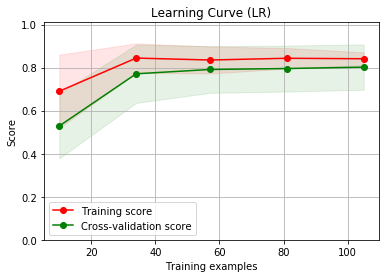

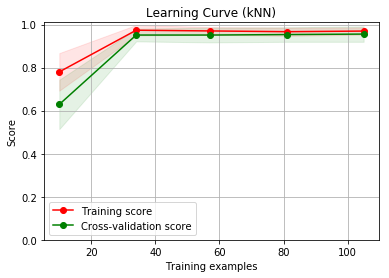

In [37]:
###################################### Plot Learning Curves (LR and kNN) #######################################

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

title = "Learning Curve (kNN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = neighbors.KNeighborsClassifier() #n_neighbors=
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

